In [20]:
import pandas as pd
import shap
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, RANSACRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split, StratifiedKFold, ShuffleSplit, GridSearchCV
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.dates as mdates
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from PIL import Image, ImageOps
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, ndcg_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from PIL import Image, ImageOps
import lime
import lime.lime_tabular

## Ridge Regression:

In [21]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)
df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

print(list(df.columns))

['Season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share', 'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%', 'defensive_DRB%', 'defensive_FT/FGA', 'Attend.', 'Attend./G', 'make_playoffs', 'overall_record', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_o

In [22]:
data_columns = ['rk_conference', 'top_3_conference', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
                '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG',
                'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%',
                'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec',
                'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_or_less_rec',
                '10pt_or_more_rec', 'pre_all_star_rec', 'post_all_star_rec', 'e_conf_rec', 'w_conf_rec', 'sum_mvp_shares', 'sum_dpoy_shares', 
                'sum_roy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_nba', 'sum_all_defense', 'sum_all_rookie',
                'sum_mvps_won', 'sum_dpoys_won', 'sum_roys_won', 'sum_mips_won', 'sum_cpoys_won', 'sum_all_nba_1st', 'sum_all_def_1st', 'sum_playoff_games',
                'sum_mvp_shares_L3S', 'sum_mvp_shares_L5S', 'sum_champion_shares', 'sum_champions', 'sum_player_L1S_cs', 'sum_player_L3S_cs', 'sum_player_L5S_cs',
                'sum_player_L8S_cs', 'sum_all_nba_1st_L5S', 'team_rating_custom', 'max_player_rating_custom','sum_coach_playoff_games', 'sum_coy_shares',
                'conference_5pt_or_less_rec', 'conference_OR', 'conference_SRS', 'conference_age', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 
                'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%',
                'defensive_DRB%', 'defensive_FT/FGA','overall_record', 'rk_season','sum_franchise_L1S_cs', 'sum_franchise_L3S_cs', 'sum_franchise_L5S_cs', 'sum_franchise_L8S_cs',
                 'rank_offensive_eFG%', 'rank_2P%', 'rank_sum_all_nba_1st_L5S', 'rank_SRS', 'top_5_offensive_eFG%', 'top_3_2P%', 'top_5_sum_all_nba_1st_L5S', 'top_6_SRS'
               ]

df= df.dropna(subset=data_columns)
data = df[data_columns].copy()

In [23]:
correlation_matrix = data.corr()

correlation_threshold = .75

columns_to_remove = set()
#print("Columns to be Removed:")
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        correlation = correlation_matrix.iloc[i, j]
        if abs(correlation) > correlation_threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            if feature_i not in columns_to_remove:
                columns_to_remove.add(feature_j)
                #print(f"{feature_j} (correlated with {feature_i}): {correlation:.2f}")

data_filtered = data.drop(columns=columns_to_remove)

In [24]:
print("Columns in data_filtered:")
print(", ".join(f"'{column}'" for column in data_filtered.columns))

print("\nColumns that were removed:")
print(", ".join(f"'{removed_column}'" for removed_column in columns_to_remove))

Columns in data_filtered:
'rk_conference', 'G', 'MP', 'FG', 'FGA', '3P', '3P%', '2P%', 'FT', 'FT%', 'ORB', 'TRB', 'AST', 'PF', 'pso', 'over500_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_or_less_rec', '10pt_or_more_rec', 'pre_all_star_rec', 'post_all_star_rec', 'e_conf_rec', 'sum_mvp_shares', 'sum_dpoy_shares', 'sum_roy_shares', 'sum_smoy_shares', 'sum_mip_shares', 'sum_cpoy_shares', 'sum_all_defense', 'sum_all_rookie', 'sum_cpoys_won', 'sum_playoff_games', 'sum_mvp_shares_L3S', 'sum_champions', 'sum_player_L1S_cs', 'sum_all_nba_1st_L5S', 'max_player_rating_custom', 'sum_coach_playoff_games', 'conference_5pt_or_less_rec', 'conference_OR', 'conference_age', 'SOS', 'DRtg', 'sum_franchise_L3S_cs', 'rank_offensive_eFG%', 'rank_sum_all_nba_1st_L5S', 'top_5_offensive_eFG%', 'top_3_2P%', 'top_5_sum_all_nba_1st_L5S', 'top_6_SRS'

Columns that were removed:
'2PA', 'rk_season', 'FG%', 'sum_all_nba_1st', '2P', 'opp_PF', 'opp_FT', 'opp_

In [25]:
features = ['top_3_conference', 'FG', '3P', '3P%', '2P', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF',  'opp_3P%','opp_FT%', 'opp_ORB',
            'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_BLK', 'Age', 'pso', 'sum_mvp_shares_L3S', 'top_6_SRS', 'top_5_offensive_eFG%' , 'sum_franchise_L3S_cs', 'sum_playoff_games', 'sum_games_5pts_or_less', 'sum_roy_shares', '3pt_or_less_rec',
            'offensive_eFG%', 'conference_OR', 'defensive_eFG%', 'sum_dpoys_won'
           ]

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 35


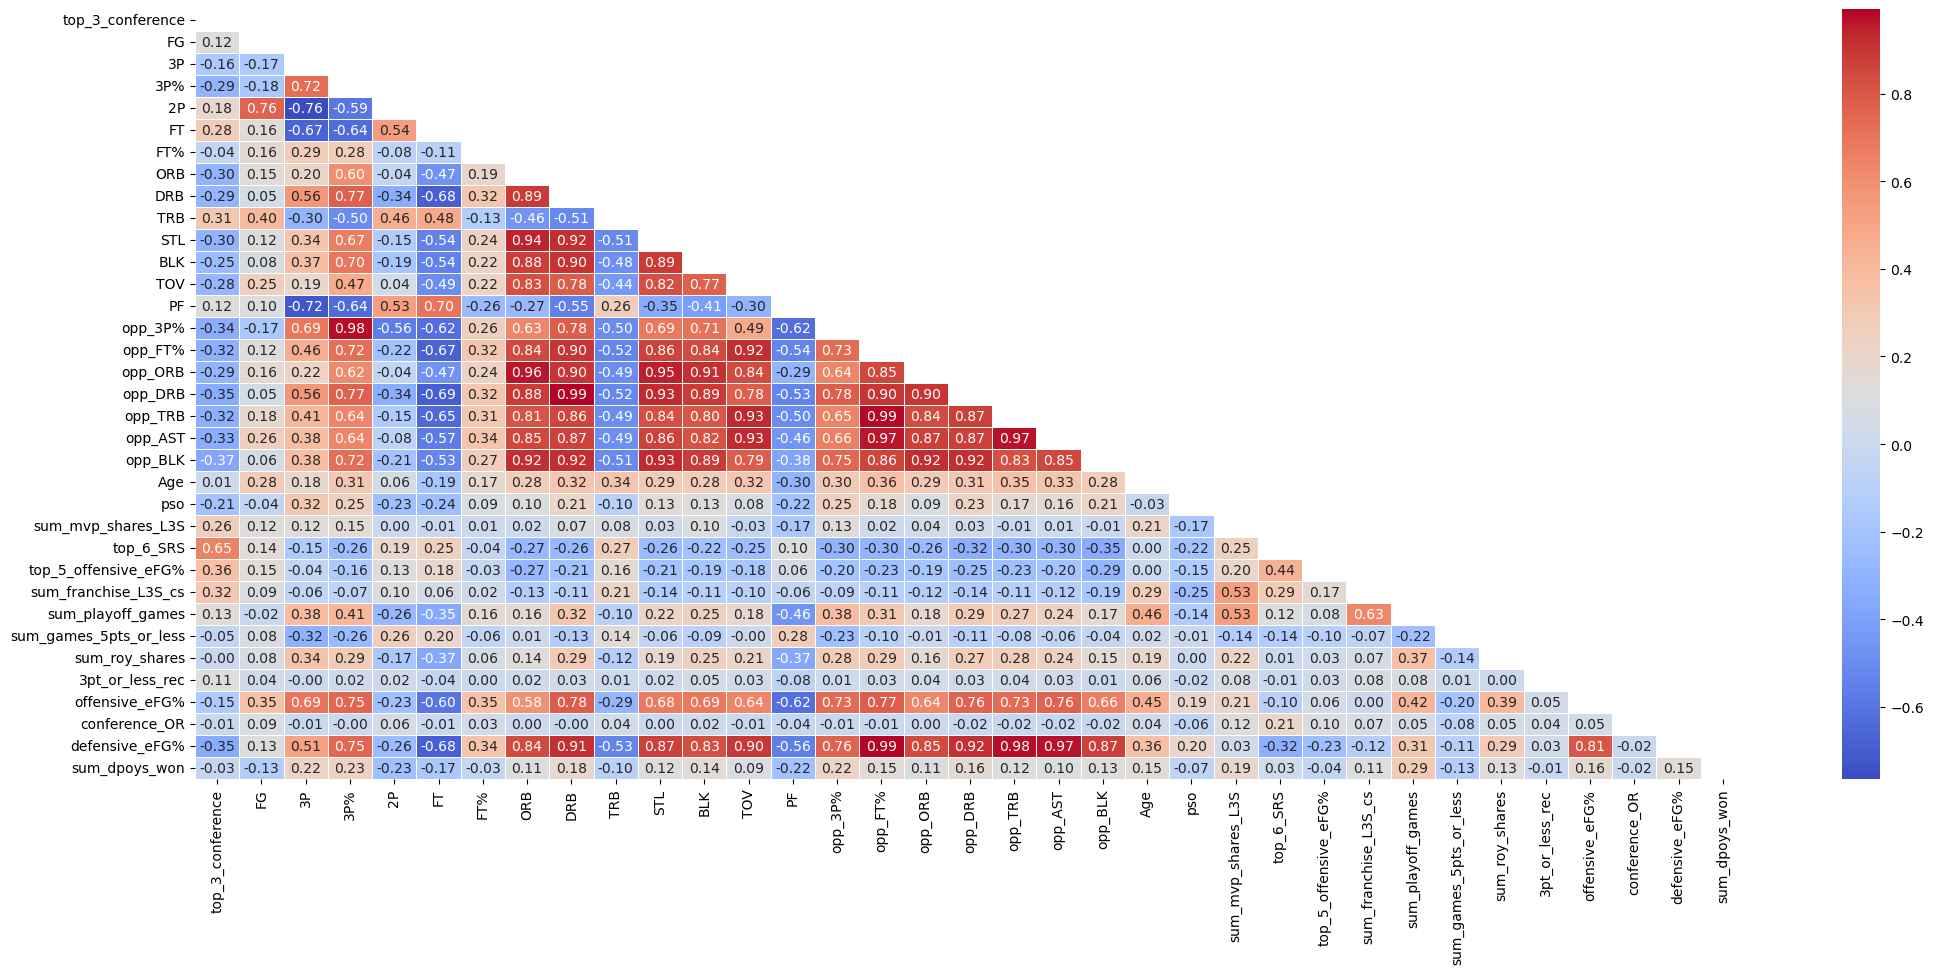

In [26]:
selected_features_data = data[features]
correlation_matrix = selected_features_data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(25, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, mask=mask)
plt.show()

Results:

    Season                    Team  champion_share  predicted_cs
0     2024          Boston Celtics          1.0000      0.656964
1     2024          Denver Nuggets          0.4375      0.554514
7     2024         Milwaukee Bucks          0.1250      0.517885
2     2024   Oklahoma City Thunder          0.3750      0.469348
3     2024  Minnesota Timberwolves          0.5625      0.463028
5     2024         New York Knicks          0.4375      0.418116
13    2024      Philadelphia 76ers          0.1250      0.187417
14    2024          Indiana Pacers          0.5000      0.141047
15    2024              Miami Heat          0.0625      0.137326
12    2024           Orlando Magic          0.1875      0.134906
10    2024     Cleveland Cavaliers          0.3125      0.124365
8     2024            Phoenix Suns          0.0000      0.105241
4     2024    Los Angeles Clippers          0.1250      0.103134
11    2024      Los Angeles Lakers          0.0625      0.093824
6     2024     

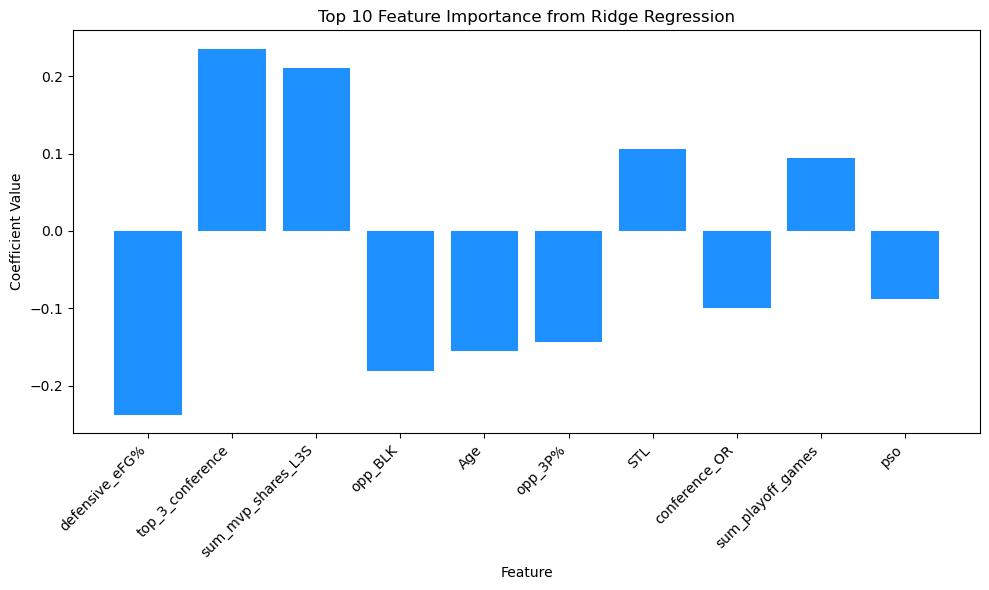

In [46]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)
df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

df.drop(df[df['Season'] < 1986].index, inplace = True)

train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

rig = Ridge(alpha=.5)
rig.fit(train[features], train["champion_share"])

predictions = rig.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

print("Results:")
print("=============================================================================\n")
print(frame.head(16))
print("-----------------------------------------------------------------------------\n")

def ndcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        dcg = np.sum(r / np.log2(np.arange(2, r.size + 2)))
        idcg = np.sum(np.sort(r)[::-1] / np.log2(np.arange(2, r.size + 2)))
        return dcg / idcg
    return 0.

def calculate_ndcg(df, k=None):
    true_relevance = df['champion_share'].values
    return ndcg_at_k(true_relevance, k)

ndcg_score_true = calculate_ndcg(frame, k=16)

print("NDCG Scores: ")
print("=============================================================================\n")
print("True NDCG @: ", ndcg_score_true)
print("-----------------------------------------------------------------------------\n")

coefficients = rig.coef_
feature_coefficients = dict(zip(features, coefficients))
sorted_feature_coefficients = sorted(feature_coefficients.items(), key=lambda x: abs(x[1]), reverse=True)

top_features = sorted_feature_coefficients[:10]
features_names = [x[0] for x in top_features]
coeff_values = [x[1] for x in top_features]

plt.figure(figsize=(10, 6))
plt.bar(features_names, coeff_values, color='dodgerblue')
plt.title('Top 10 Feature Importance from Ridge Regression')
plt.ylabel('Coefficient Value')
plt.xlabel('Feature')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


predictions = rig.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
rig_reg_frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
rig_reg_frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

In [31]:
actual = frame.sort_values("champion_share", ascending=False)
predicted = frame.sort_values("predicted_cs", ascending=False)
actual["Rank"] = list(range(1, actual.shape[0]+1))
predicted["Predicted Rank"] = list(range(1, predicted.shape[0]+1))

ranking_results = actual.merge(predicted, on="Team").head(1) #HEAD
print("Ranking Accuracy (Champion):")
print("=============================================================================\n")
print(ranking_results.to_string())

def find_ap(frame):
    actual = frame.sort_values("champion_share", ascending=False).head(1) #HEAD

    predicted = frame.sort_values("predicted_cs", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index, row in predicted.iterrows():
        if row["Team"] in actual["Team"].values:
            found += 1
            ps.append(found / seen)
        seen += 1
    return sum(ps) / len(ps)

ap = find_ap(frame)
print("=============================================================================\n")
print("AP Champion: ", ap)

Ranking Accuracy (Champion):

   Season_x            Team  champion_share_x  predicted_cs_x  Rank  Season_y  champion_share_y  predicted_cs_y  Predicted Rank
0      2024  Boston Celtics               1.0        0.656964     1      2024               1.0        0.656964               1

AP Champion:  1.0


In [32]:

rig_reg_combined_predictions = pd.DataFrame(columns=["Season", "Team/Season", "Team", "predicted_cs", "champion_share"])

all_predictions = []
aps = []
ndcgs = []

backtest_seasons = [2020,2021,2022,2023,2024]
#backtest_seasons = list(range(2024, 1959, -1))

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    rig.fit(train[features], train['champion_share'])
    predictions = rig.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
    frame = pd.concat([test[["Team", "champion_share", "Season"]], predictions_df], axis=1)

    frame['Team/Season'] = frame['Team'] + ' ' + frame['Season'].astype(str)

    rig_reg_combined_predictions = pd.concat([rig_reg_combined_predictions, frame], ignore_index=True)

    if not frame.empty:
        all_predictions.append(frame)
        ap = find_ap(frame)
        aps.append(ap)

        ndcg = ndcg_score(frame["champion_share"].values.reshape(1, -1), predictions.reshape(1, -1))
        ndcgs.append(ndcg)

        reciprocal_ap = 1 / ap
        print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)} | NDCG: {round(ndcg, 2)}")
    else:
        print(f"No data for Season {season}")

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted_cs", ascending=False).head(5)

    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted_cs", "champion_share"]])

average_ndcg = np.mean(ndcgs)
average_ap = np.mean(aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_ndcg = 1.0 / average_ndcg

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average Champion Rank: {round(reciprocal_average_ap, 2)} | Reciprocal NDCG: {round(reciprocal_ndcg, 2)}")
print(f"Min Champion Rank: {round(reciprocal_min_ap, 2)}")
print(f"Max Champion Rank: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

rig_reg_combined_predictions.to_csv("rig_reg_nba_preds.csv", index=False)

Champion AP for Season 2020: 1.0 | Reciprocal: 1.0 | NDCG: 0.92
Champion AP for Season 2021: 1.0 | Reciprocal: 1.0 | NDCG: 0.94
Champion AP for Season 2022: 1.0 | Reciprocal: 1.0 | NDCG: 0.94
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0 | NDCG: 0.87
Champion AP for Season 2024: 1.0 | Reciprocal: 1.0 | NDCG: 0.9

Top 5 Predicted Teams for Season 2020:
                     Team  predicted_cs  champion_share
122    Los Angeles Lakers      0.680264          1.0000
120       Milwaukee Bucks      0.649577          0.3125
123  Los Angeles Clippers      0.578535          0.4375
124        Boston Celtics      0.500085          0.6250
121       Toronto Raptors      0.489941          0.4375

Top 5 Predicted Teams for Season 2021:
                    Team  predicted_cs  champion_share
96       Milwaukee Bucks      0.623035          1.0000
93         Brooklyn Nets      0.609213          0.4375
90             Utah Jazz      0.597324          0.3750
95  Los Angeles Clippers      0.593823       

C:\Users\allen\AppData\Local\Temp\ipykernel_2540\1379702707.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rig_reg_combined_predictions = pd.concat([rig_reg_combined_predictions, frame], ignore_index=True)


### Analyze Model Decision Making

Top 10 Features:
['top_3_conference', 'defensive_eFG%', 'sum_mvp_shares_L3S', 'top_6_SRS', 'top_5_offensive_eFG%', 'offensive_eFG%', '3P', 'conference_OR', 'Age', 'opp_AST']


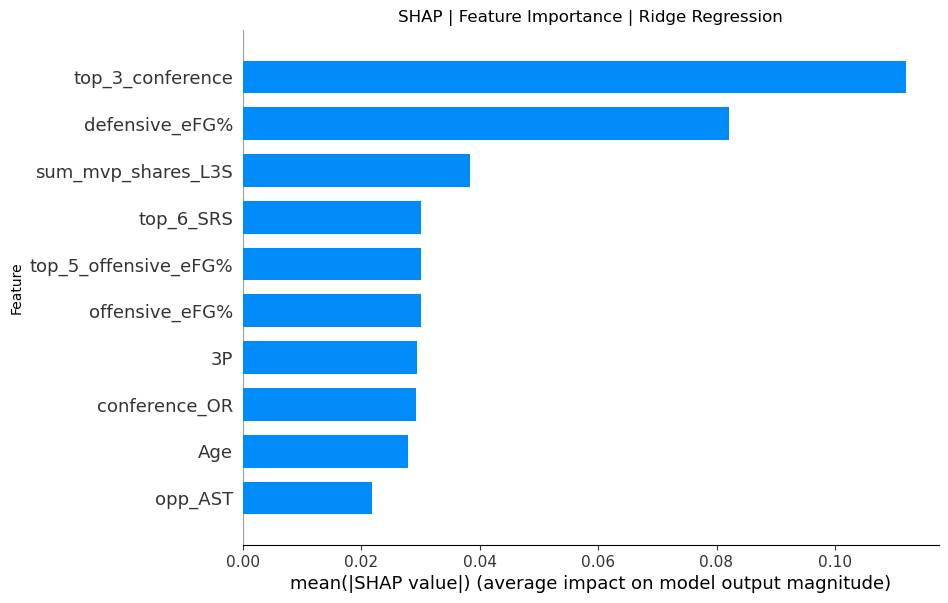

In [33]:
explainer = shap.LinearExplainer(rig, train[features])
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)
plt.title('SHAP | Feature Importance | Ridge Regression')

plt.savefig("ridge_shap_bar.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("ridge_shap_bar.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("ridge_shap_bar.png")

plt.ylabel("Feature")
plt.show()

Top 10 Features:
['top_3_conference', 'defensive_eFG%', 'sum_mvp_shares_L3S', 'top_6_SRS', 'top_5_offensive_eFG%', 'offensive_eFG%', '3P', 'conference_OR', 'Age', 'opp_AST']


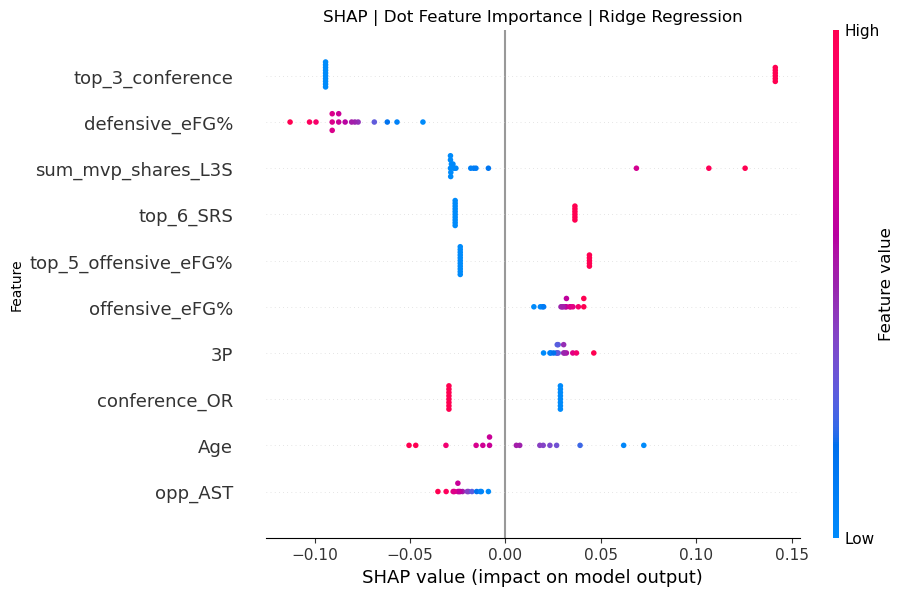

In [34]:

explainer = shap.LinearExplainer(rig, train[features])
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | Ridge Regression')

plt.savefig("rig_shap_dot.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("rig_shap_dot.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("rig_shap_dot.png")

plt.ylabel("Feature")
plt.show()

### XG-Boost Regression:

In [35]:
print(list(df))

['Season', 'Team', 'team_id', 'conference', 'max_player', 'champion_share', 'champion', 'Rk', 'rk_season', 'Arena', 'rk_conference', 'top_3_conference', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS', 'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'offensive_eFG%', 'offensive_TOV%', 'offensive_ORB%', 'offensive_FT/FGA', 'defensive_eFG%', 'defensive_TOV%', 'defensive_DRB%', 'defensive_FT/FGA', 'Attend.', 'Attend./G', 'make_playoffs', 'overall_record', 'G', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'opp_G', 'opp_MP', 'opp_FG', 'opp_FGA', 'opp_FG%', 'opp_3P', 'opp_3PA', 'opp_3P%', 'opp_2P', 'opp_2PA', 'opp_2P%', 'opp_FT', 'opp_FTA', 'opp_FT%', 'opp_ORB', 'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_STL', 'opp_BLK', 'opp_TOV', 'opp_PF', 'opp_PTS', 'pso', 'over500_rec', 'over600_rec', 'sum_wins_20pts_or_more', 'rec_5pt_or_less', 'sum_games_5pts_or_less', 'home_rec', 'road_rec', '3pt_o

In [36]:
features = ['top_3_conference', 'FG', '3P', '3P%', '2P', 'FT', 'FT%', 'ORB', 'DRB', 'TRB', 'STL', 'BLK', 'TOV', 'PF',  'opp_3P%','opp_FT%', 'opp_ORB',
            'opp_DRB', 'opp_TRB', 'opp_AST', 'opp_BLK', 'Age', 'pso', 'sum_mvp_shares_L3S', 'top_6_SRS', 'top_5_offensive_eFG%' , 'sum_franchise_L3S_cs', 'sum_playoff_games', 'sum_games_5pts_or_less', 'sum_roy_shares', '3pt_or_less_rec',
            'offensive_eFG%', 'conference_OR', 'defensive_eFG%', 'sum_dpoys_won', 'sum_mvp_shares', 'sum_dpoy_shares', '3PAr', 'TS%', 'sum_mips_won','DRtg', 'sum_player_L5S_cs','sum_all_def_1st', 'sum_mvps_won'
           ]

num_features = len(features)

print(f"Number of features: {num_features}")

Number of features: 44


Results:

    Season                    Team  champion_share  predicted_cs
0     2024          Boston Celtics          1.0000      0.691130
1     2024          Denver Nuggets          0.4375      0.565475
7     2024         Milwaukee Bucks          0.1250      0.556494
2     2024   Oklahoma City Thunder          0.3750      0.524929
5     2024         New York Knicks          0.4375      0.512692
3     2024  Minnesota Timberwolves          0.5625      0.466483
11    2024      Los Angeles Lakers          0.0625      0.366757
15    2024              Miami Heat          0.0625      0.226922
14    2024          Indiana Pacers          0.5000      0.206647
9     2024    New Orleans Pelicans          0.0000      0.198462
8     2024            Phoenix Suns          0.0000      0.195792
13    2024      Philadelphia 76ers          0.1250      0.190427
10    2024     Cleveland Cavaliers          0.3125      0.182727
4     2024    Los Angeles Clippers          0.1250      0.169204
6     2024     

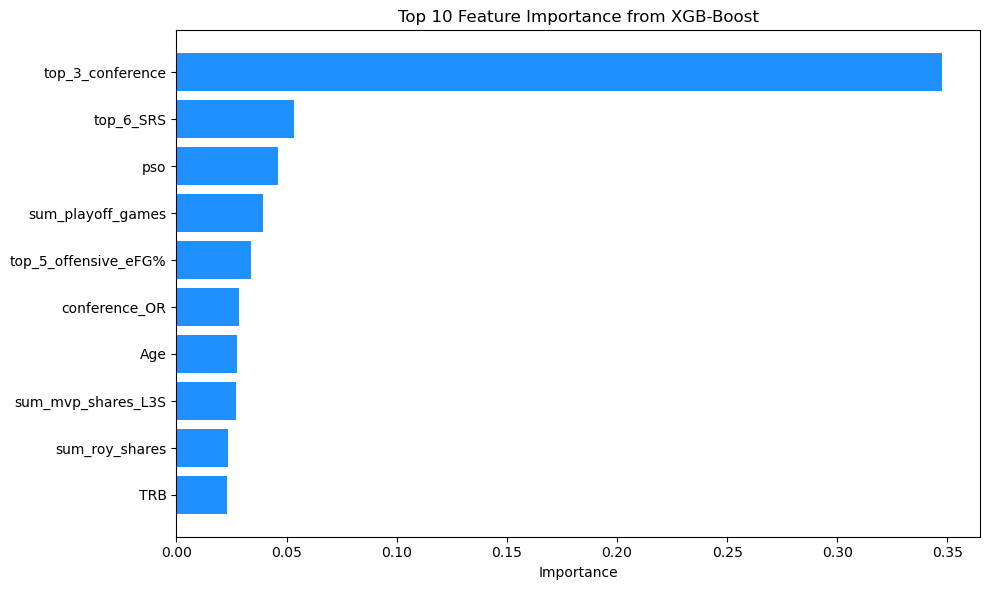

In [48]:
df = pd.read_csv("NBA Champion RawData.csv")
df = df.fillna(0)

df.rename(columns={'season': 'Season'}, inplace=True)
df = df[df['make_playoffs'] == 1]

df.drop(df[df['Season'] < 1988].index, inplace=True)

train = df[df["Season"] < 2024].copy()
test = df[df["Season"] == 2024].copy()

sc = MinMaxScaler()
sc.fit(train[features])
train[features] = sc.transform(train[features])
test[features] = sc.transform(test[features])

xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror', 
    n_estimators=44, max_depth=3, 
    learning_rate=0.1, 
    random_state=5
    )

xgb_model.fit(train[features], train["champion_share"])

predictions = xgb_model.predict(test[features])
predictions = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)

frame = pd.concat([test[["Season", "Team", "champion_share"]], predictions], axis=1)
frame.sort_values(["Season", "predicted_cs"], inplace=True, ascending=[False, False])

print("Results:")
print("=============================================================================\n")
print(frame.head(16))
print("-----------------------------------------------------------------------------\n")

def ndcg_at_k(r, k):
    r = np.asfarray(r)[:k]
    if r.size:
        dcg = np.sum(r / np.log2(np.arange(2, r.size + 2)))
        idcg = np.sum(np.sort(r)[::-1] / np.log2(np.arange(2, r.size + 2)))
        return dcg / idcg
    return 0.

def calculate_ndcg(df, k=16):
    true_relevance = df['champion_share'].values
    return ndcg_at_k(true_relevance, k)

ndcg_score_true = calculate_ndcg(frame, k=16)
print("NDCG Scores: ")
print("=============================================================================\n")
print("True NDCG @: ", ndcg_score_true)
print("-----------------------------------------------------------------------------\n")

xgb_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(xgb_importance)[::-1]
top_features = [features[i] for i in sorted_idx[:10]]
importance_values = xgb_importance[sorted_idx[:10]]

# Create the figure
fig, ax = plt.subplots(figsize=(10, 6))

# Create the horizontal bar chart
ax.barh(top_features, importance_values, color='dodgerblue')
ax.set_title('Top 10 Feature Importance from XGB-Boost')
ax.set_xlabel('Importance') 
ax.invert_yaxis()
plt.tight_layout()
plt.show()


In [38]:

xgb_reg_combined_predictions = pd.DataFrame(columns=["Season", "Team/Season", "Team", "predicted_cs", "champion_share"])

all_predictions = []
aps = []
ndcgs = []

backtest_seasons = [2020,2021,2022,2023,2024]
#backtest_seasons = list(range(2024, 1959, -1))

for season in backtest_seasons:
    train = df[df["Season"] < season].copy()
    test = df[df["Season"] == season].copy()

    sc = MinMaxScaler()
    sc.fit(train[features])
    train[features] = sc.transform(train[features])
    test[features] = sc.transform(test[features])

    xgb_model.fit(train[features], train['champion_share'])
    predictions = xgb_model.predict(test[features])
    predictions_df = pd.DataFrame(predictions, columns=["predicted_cs"], index=test.index)
    frame = pd.concat([test[["Team", "champion_share", "Season"]], predictions_df], axis=1)

    frame['Team/Season'] = frame['Team'] + ' ' + frame['Season'].astype(str)

    xgb_reg_combined_predictions = pd.concat([xgb_reg_combined_predictions, frame], ignore_index=True)

    if not frame.empty:
        all_predictions.append(frame)
        ap = find_ap(frame)
        aps.append(ap)

        ndcg = ndcg_score(frame["champion_share"].values.reshape(1, -1), predictions.reshape(1, -1))
        ndcgs.append(ndcg)

        reciprocal_ap = 1 / ap
        print(f"Champion AP for Season {season}: {round(ap, 2)} | Reciprocal: {round(reciprocal_ap, 2)} | NDCG: {round(ndcg, 2)}")
    else:
        print(f"No data for Season {season}")

for idx, predictions in enumerate(all_predictions):
    season = backtest_seasons[idx]
    top5_predictions = predictions.sort_values("predicted_cs", ascending=False).head(5)

    print(f"\nTop 5 Predicted Teams for Season {season}:")
    print(top5_predictions[["Team", "predicted_cs", "champion_share"]])

average_ndcg = np.mean(ndcgs)
average_ap = np.mean(aps)

reciprocal_average_ap = 1.0 / average_ap
reciprocal_ndcg = 1.0 / average_ndcg

last_n_seasons_aps = aps[-10:]
min_ap = np.min(last_n_seasons_aps)
max_ap = np.max(last_n_seasons_aps)

reciprocal_min_ap = 1.0 / min_ap
reciprocal_max_ap = 1.0 / max_ap

print("\nAverage Error Metrics Across All Seasons:")
print("=============================================================================")
print(f"Average Champion Rank: {round(reciprocal_average_ap, 2)} | Reciprocal NDCG: {round(reciprocal_ndcg, 2)}")
print(f"Min Champion Rank: {round(reciprocal_min_ap, 2)}")
print(f"Max Champion Rank: {round(reciprocal_max_ap, 2)}")
print("=============================================================================")

xgb_reg_combined_predictions.to_csv("xgb_reg_nba_preds.csv", index=False)

C:\Users\allen\AppData\Local\Temp\ipykernel_2540\1917975830.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  xgb_reg_combined_predictions = pd.concat([xgb_reg_combined_predictions, frame], ignore_index=True)


Champion AP for Season 2020: 1.0 | Reciprocal: 1.0 | NDCG: 0.92
Champion AP for Season 2021: 1.0 | Reciprocal: 1.0 | NDCG: 0.93
Champion AP for Season 2022: 1.0 | Reciprocal: 1.0 | NDCG: 0.93
Champion AP for Season 2023: 1.0 | Reciprocal: 1.0 | NDCG: 0.86
Champion AP for Season 2024: 1.0 | Reciprocal: 1.0 | NDCG: 0.9

Top 5 Predicted Teams for Season 2020:
                     Team  predicted_cs  champion_share
122    Los Angeles Lakers      0.709710          1.0000
123  Los Angeles Clippers      0.703193          0.4375
120       Milwaukee Bucks      0.620205          0.3125
121       Toronto Raptors      0.531643          0.4375
125        Denver Nuggets      0.515133          0.5625

Top 5 Predicted Teams for Season 2021:
                    Team  predicted_cs  champion_share
96       Milwaukee Bucks      0.638676          1.0000
93         Brooklyn Nets      0.615976          0.4375
92    Philadelphia 76ers      0.606036          0.4375
90             Utah Jazz      0.538372       

### Analyzing Model Decision Making

Top 10 Features:
['top_3_conference', 'top_6_SRS', 'TS%', 'pso', 'top_5_offensive_eFG%', 'opp_BLK', 'FG', '3P', 'offensive_eFG%', 'Age']


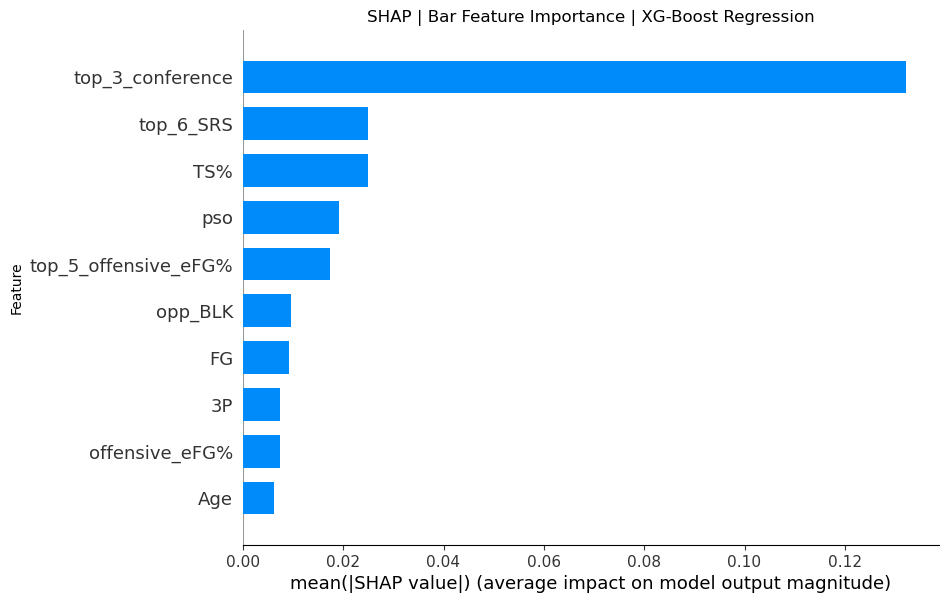

In [39]:
explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, plot_type="bar", show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Bar Feature Importance | XG-Boost Regression')

plt.savefig("xgb_shap_bar.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("xgb_shap_bar.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("xgb_shap_bar.png")

plt.ylabel("Feature")
plt.show()

Top 10 Features:
['top_3_conference', 'top_6_SRS', 'TS%', 'pso', 'top_5_offensive_eFG%', 'opp_BLK', 'FG', '3P', 'offensive_eFG%', 'Age']


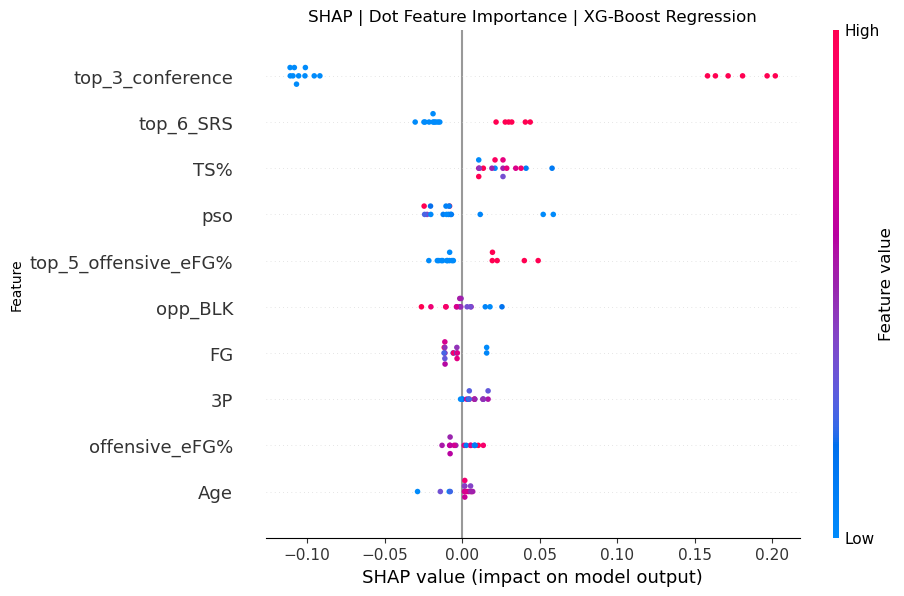

In [40]:

explainer = shap.Explainer(xgb_model)
shap_values = explainer.shap_values(test[features])

feature_importance = np.abs(shap_values).mean(axis=0)
top_features = feature_importance.argsort()[::-1][:10]

top_features_list = [features[index] for index in top_features]
print("Top 10 Features:")
print(top_features_list)

shap_values_top = shap_values[:, top_features]
test_top_features = test[top_features_list]

shap.summary_plot(shap_values_top, test_top_features, feature_names=top_features_list, show=False)
plt.gcf().set_size_inches(10, 6)

plt.title('SHAP | Dot Feature Importance | XG-Boost Regression')

plt.savefig("xgb_shap_dot.png", bbox_inches='tight', pad_inches=0.1)
image = Image.open("xgb_shap_dot.png")
image_with_border = ImageOps.expand(image, border=2, fill='black')
image_with_border.save("xgb_shap_dot.png")

plt.ylabel("Feature")
plt.show()